In [2]:
# import libraries
import json
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Combine three datasets to one iClinq dataset
def read_and_parse_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as json_file:
        data = json.load(json_file)
        
    filtered_data = []
    for item in data:
        filtered_item = {key: item.get(key, None) for key in ['question', 'answer', 'tags']}
        filtered_data.append(filtered_item)
    
    df = pd.DataFrame(filtered_data)
    
    for column in ['question', 'answer', 'tags']:
        if column not in df.columns:
            df[column] = None
            
    df.rename(columns={'question': 'Question', 'answer': 'Answer', 'tags': 'Tag'}, inplace=True)
    
    return df

file_paths = ['webmdQAs.json', 'questionDoctorQAs.json', 'ehealthforumQAs.json']

combined_df = pd.concat([read_and_parse_json(file_path) for file_path in file_paths], ignore_index=True)

print(combined_df)

                                                Question  \
0      my 5 1/2-year-old son displays adhd symptoms f...   
1      my son has add and mild autism. he has been su...   
2      my son is 13 and is depressed. he has been tak...   
3      my 17-year-old has stopped taking concerta aft...   
4      i've been taking respa-ar for allergies. i can...   
...                                                  ...   
29282  i belive my boyfriend is bipolar or has boderl...   
29283  why do i feel so down when someone makes fun o...   
29284  please help! my fiance is bipolar but will not...   
29285  i constantly have bursts of anger for no reaso...   
29286  hello i'm 20 years old and i've always seemed ...   

                                                  Answer  \
0      adhd and bipolar mood disorder (bmd) can coexi...   
1      stimulants in general tend to decrease appetit...   
2      while any of the stimulant medications can inc...   
3      seventy percent of teens diagnos

In [10]:
df.reset_index(drop=True, inplace=True)

# Save the DataFrame as a CSV file
df.to_csv('icliniq_dataset.csv')

In [6]:
file_path = "./icliniq_dataset.csv"
df_icliniq = pd.read_csv(file_path)
df_icliniq.head()

,Unnamed: 0,Question,Answer,Tag
0,0,my 5 1/2-year-old son displays adhd symptoms f...,adhd and bipolar mood disorder (bmd) can coexi...,['attention deficit hyperactivity disorder']
1,1,my son has add and mild autism. he has been su...,stimulants in general tend to decrease appetit...,"['autism', 'weight loss']"
2,2,my son is 13 and is depressed. he has been tak...,while any of the stimulant medications can inc...,[]
3,3,my 17-year-old has stopped taking concerta aft...,seventy percent of teens diagnosed when they a...,['attention deficit hyperactivity disorder']
4,4,i've been taking respa-ar for allergies. i can...,try claritin-d which is located behind the pha...,['allergy']


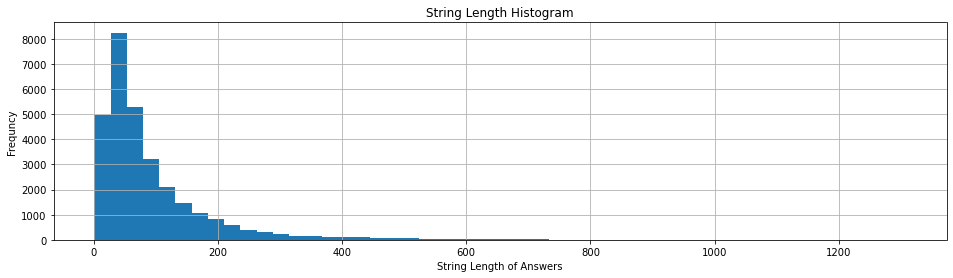

In [7]:
df_icliniq['ans_len'] = df_icliniq['Answer'].str.split().str.len()

plt.figure(figsize = (16,4))
plt.hist(df_icliniq['ans_len'], bins=50)
plt.xlabel("String Length of Answers")
plt.ylabel("Frequncy")
plt.title("String Length Histogram")
plt.grid(True)
plt.show()

In [8]:
df_icliniq_filtered = df_icliniq.loc[df_icliniq['ans_len'] <= 150]

print(len(df_icliniq))
print(len(df_icliniq_filtered))

29752
24911


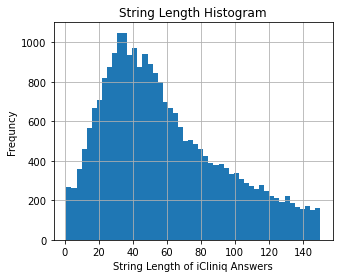

In [10]:
plt.figure(figsize = (5,4))
plt.hist(df_icliniq_filtered['ans_len'], bins=50)
plt.xlabel("String Length of iCliniq Answers")
plt.ylabel("Frequncy")
plt.title("String Length Histogram")
plt.grid(True)
plt.show()